import pandas as pd

Concat train and val txt dataset into one

In [2]:
with open('train.txt') as f1:
    with open('val.txt') as f2:
        data = f1.readlines() + f2.readlines()   

Create dataframe with dataset and print row count

In [3]:
df = pd.DataFrame({'message': [i.split(';')[0] for i in data], 'emotion': [i.split(';')[1][:-1] for i in data]})
df.shape[0]

18000

Print all emotions in $emotion$ column

In [4]:
print(df.emotion.unique())

['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


Convert all emotion into positive and negative and binarize it

In [5]:
df['emotion'] = df['emotion'].replace(['sadness', 'anger', 'fear'], 0)
df['emotion'] = df['emotion'].replace(['love', 'surprise', 'joy'], 1)

Rename columns and show head rows

In [6]:
df.columns = ['msg', 'pos']
df.head()

,msg,pos
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [40]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

Download required word sets

In [39]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Create set of english stopwords

In [12]:
stws = set(stopwords.words('english'))

Build function for further operation which concat every single character of each word into one

In [13]:
def concat_row(data, col):
    return ' '.join(' '.join(word for word in process_text(row)) for row in data[col])

Define function for preprocessing text: remove all punctuation, set words to its lemma and return lower case string

In [25]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    lemm = WordNetLemmatizer()
    clean_words = [lemm.lemmatize(word.lower(), wordnet.VERB) for word in nopunc.split() if word.lower() not in stws]

    return clean_words

Make visualization of frequently encountered words(the bigger the frequent)

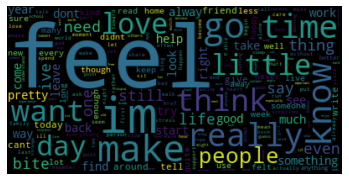

In [26]:
wordcloud = WordCloud(collocations=False).generate(concat_row(df, 'msg'))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Create bag of words

In [46]:
messages_bow = CountVectorizer(analyzer=process_text).fit(df['msg'])

Build model and split the data

In [28]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(messages_bow.transform(df['msg']), df.pos, train_size=0.8, random_state=25)

Fit data into model

In [37]:
lr.fit(X_train, y_train);

Get prediction score

In [31]:
lr.score(X_test, y_test)

0.9505555555555556

In [32]:
from sklearn.model_selection import cross_val_score

Make validation 10 times with $cross$ $validation$ $score$

In [33]:
scores = cross_val_score(lr, X_test, y_test, cv=10, scoring='accuracy')
print(scores)

[0.93888889 0.89166667 0.9        0.91388889 0.91388889 0.91666667
 0.89444444 0.90277778 0.90277778 0.91111111]


Show mean of $cross_val_score$ results

In [34]:
scores.mean()

0.9086111111111113

Make prediction to text (0 - negative, 1 - positive)

In [45]:
print(lr.predict(messages_bow.transform(['i feel so bad, i want to die'])))

[0]


In [44]:
print(lr.predict(messages_bow.transform(['i love this world, because all things are good'])))

[1]
